# KMeans Clustering

## Zaidan Mufaddhal | AIU20092029

### 1. Data pre-processing step

#### Importing libraries

In [1]:
# Importing the libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

#### Importing dataset

In [23]:
# Importing the dataset  
rawdata = pd.read_csv('Downloads/ClusteringHSS.csv')  

In [24]:
rawdata

,ID,Gender_Code,Region,Income,Spending
0,1,Female,Rural,20.0,15.0
1,2,Male,Rural,5.0,12.0
2,3,Female,Urban,28.0,18.0
3,4,Male,Urban,40.0,10.0
4,5,Male,Urban,42.0,9.0
...,...,...,...,...,...
1108,1109,Female,Urban,33.0,16.0
1109,1110,Male,Urban,48.0,7.0
1110,1111,Male,Urban,31.0,16.0
1111,1112,Male,Urban,50.0,14.0


#### Cleaning the null value

In [25]:
rawdata.isnull().sum()

ID             0
Gender_Code    6
Region         6
Income         6
Spending       5
dtype: int64

In [26]:
data = rawdata.dropna()

In [28]:
data.isnull().sum()

ID             0
Gender_Code    0
Region         0
Income         0
Spending       0
dtype: int64

#### Extracting independent variables

In [29]:
x = data.iloc[:, [3, 4]].values 

In [30]:
x

array([[20., 15.],
       [ 5., 12.],
       [28., 18.],
       ...,
       [31., 16.],
       [50., 14.],
       [26., 11.]])

### 2. Finding the optimal number of clusters using the elbow method

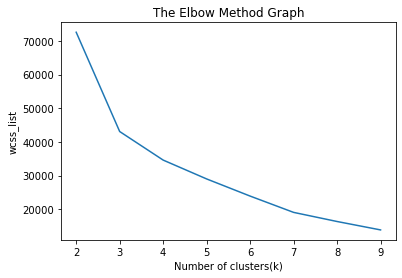

In [32]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 2 to 9.  
for i in range(2, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(2, 10), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [33]:
wcss_list

[72581.49085349138,
 43082.289092403036,
 34596.95637547756,
 28996.063999910533,
 23902.134541137337,
 19058.833001960254,
 16349.579127083465,
 13849.977851485946]

### 3. Training the K-means algorithm on the training dataset

In [34]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=7, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

In [35]:
y_predict

array([0, 2, 3, ..., 3, 1, 0])

### 4. Visualizing the clusters

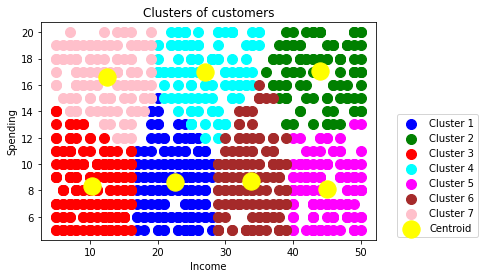

In [44]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(x[y_predict == 5, 0], x[y_predict == 5, 1], s = 100, c = 'brown', label = 'Cluster 6') #for sixth cluster  
plt.scatter(x[y_predict == 6, 0], x[y_predict == 6, 1], s = 100, c = 'pink', label = 'Cluster 7') #for seventh cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Income')  
plt.ylabel('Spending')  
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show() 